In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importamos los datos, y separamos en Noise,Neuron y Multiunit

In [31]:
data = pd.read_pickle('Datos/PCCIBNM')
noise = data[data.bNoise == 1]
neuron = data[data.bNoise == 0]
MU = data[data.bNoise == 2]

In [23]:
data.columns

Index(['PatientExperiment', 'Channel', 'Cluster', 'ISI', 'Bulk', 'bNoise',
       'Mean'],
      dtype='object')

In [4]:
print(len(noise))
print(len(neuron))
print(len(MU))

1069
317
203


### Ejemplo de la media

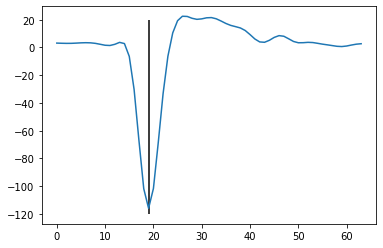

In [11]:
fig = plt.figure(1)
ax = fig.subplots(1)
x = neuron.Mean.iloc[10]
ax.plot(np.arange(len(x)),x)
plt.vlines(x = 19,ymin = -120,ymax = 20)

### Puede verse que el pico de cada spike se encuentra en el elemento 20 (i = 19)

In [6]:
data['Amplitude'] = data.Mean.apply(lambda row: abs(min(row) - max(row)))

Text(0.5, 1.0, 'Amplitude')

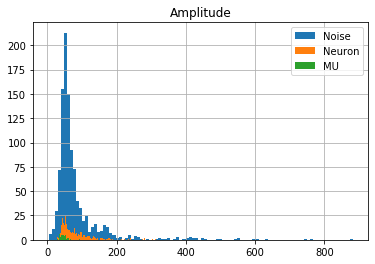

In [41]:
data.Amplitude[data.bNoise == 1].hist(bins = 100)
data.Amplitude[data.bNoise == 0].hist(bins = 100)
data.Amplitude[data.bNoise == 2].hist(bins = 100)
plt.legend(['Noise','Neuron','MU'])
plt.title('Amplitude')

### Obtenemos la Standard deviation del cluster

In [7]:
data['SD'] = data.Bulk.apply(lambda row: np.std(row,axis = 0))

In [13]:
A = data.SD.apply(lambda row: np.mean(row,axis =0 ))

Text(0.5, 1.0, 'Mean of Std')

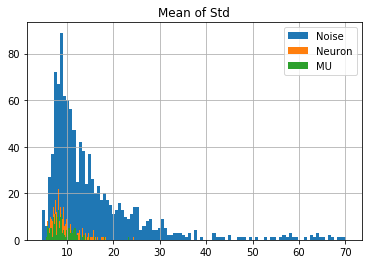

In [14]:
A[data.bNoise == 1].hist(bins = 100)
A[data.bNoise == 0].hist(bins = 100)
A[data.bNoise == 2].hist(bins = 100)
plt.legend(['Noise','Neuron','MU'])
plt.title('Mean of Std')

### Computamos la derivada de la media

Text(0.5, 1.0, 'derivative in the peak, i = 20')

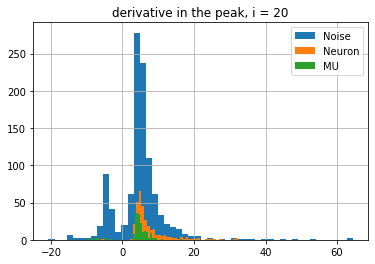

In [8]:

i = 20
data['derivative_peak'] = data.Mean.apply(lambda row: np.gradient(row)[i])
data[data.bNoise == 1].derivative.hist(bins = 50)
data[data.bNoise == 0].derivative.hist(bins = 50)
data[data.bNoise == 2].derivative.hist(bins = 50)
plt.legend(['Noise','Neuron','MU'])
plt.title('derivative in the peak, i = {}'.format(i))

Text(0.5, 1.0, 'Max_derivative')

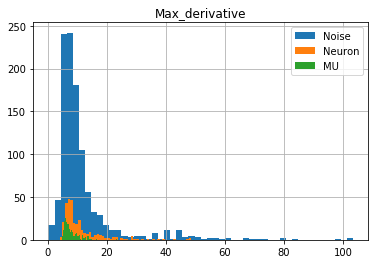

In [42]:
data['derivative_max'] = data.Mean.apply(lambda row: max(np.gradient(row)))
data[data.bNoise == 1].derivative_max.hist(bins = 50)
data[data.bNoise == 0].derivative_max.hist(bins = 50)
data[data.bNoise == 2].derivative_max.hist(bins = 50)
plt.legend(['Noise','Neuron','MU'])
plt.title('Max_derivative'.format(i))

### Numero de Zero Crossings

In [32]:
def zero_crossings(sign):
    return len(np.where(np.diff(np.sign(sign)))[0])

In [33]:
data['ZeroCrossings'] = data.Mean.apply(lambda row: zero_crossings(row))

Text(0.5, 1.0, 'Zero_crossings')

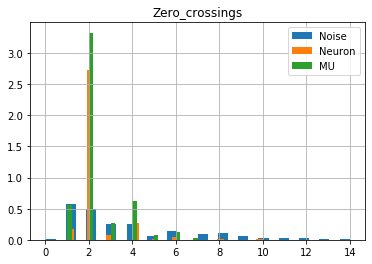

In [39]:
h_noise = data.ZeroCrossings[data.bNoise == 1]
h_neuron = data.ZeroCrossings[data.bNoise == 0]
h_Mu = data.ZeroCrossings[data.bNoise == 2]


h_noise.hist(bins = 30,density = True)
h_neuron.hist(bins = 30,density = True)
h_Mu.hist(bins = 30,density = True)
plt.legend(['Noise','Neuron','MU'])
plt.title('Zero_crossings')


### Analizamos el ISI

In [241]:
def Isi_pc(Isi_example,i):
    suma = np.sum(Isi_example)
    if suma == 0: return 0
    else:
        return np.sum(Isi_example[:i])/suma

In [301]:
band = 5
pc = data.ISI.apply(Isi_pc,args=(band,))

In [297]:
x = []
threshold_list = np.linspace(0,1,1000)
for t in threshold_list:
    Noise_pc = pc[data.bNoise == 1]
    Noise_eliminated = len(Noise_pc[Noise_pc >=t])/len(Noise_pc)
    Neuron_pc = pc[data.bNoise == 0]
    Neuron_eliminated = len(Neuron_pc[Neuron_pc >=t])/len(Neuron_pc)
    MU_pc = pc[data.bNoise == 2]
    MU_eliminated = len(MU_pc[MU_pc >=t])/len(MU_pc)
    x.append([Noise_eliminated,Neuron_eliminated,MU_eliminated])
x = np.array(x).T

Text(0.5, 1.0, '60 Hz')

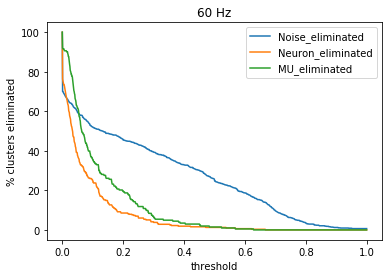

In [318]:
x *= 100
plt.plot(threshold_list,x[0],label = 'Noise_eliminated')
plt.plot(threshold_list,x[1],label = 'Neuron_eliminated')
plt.plot(threshold_list,x[2],label = 'MU_eliminated')
plt.legend()
plt.ylabel('% clusters eliminated')
plt.xlabel('threshold')
plt.title(str((band + 1)*10)+' Hz')

In [299]:
print(min(np.where(x[1] == 0)[0]))
print(min(np.where(x[2] == 0)[0]))

667
628


###### Distribucion de los porcentajes de ISI

(0, 50)

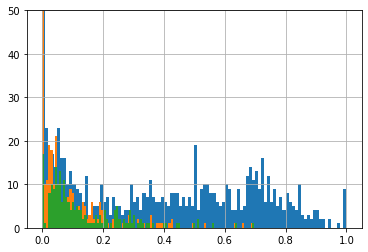

In [287]:
Noise_pc.hist(bins = 100)
Neuron_pc.hist(bins = 100)
MU_pc.hist(bins = 100)
plt.ylim(0,50)

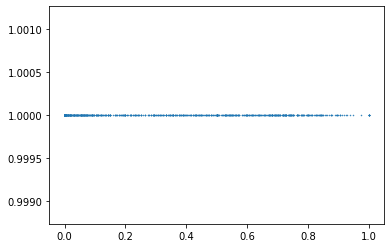

In [281]:
plt.scatter(Noise_pc,r,marker = '.',s = 1)

In [26]:
data = data.to_pickle('Datos/PCCIBNMZc')